        Sport  1896  1900  1904  1906*  1908  1912  1920  1924  1928  ...  \
0    Aquatics     4     8    12      5     9    14    16    17    16  ...   
1     Archery     0     7     6      0     3     0    10     0     0  ...   
2   Athletics    12    23    25     21    26    30    29    27    27  ...   
3   Badminton     0     0     0      0     0     0     0     0     0  ...   
4  Basketball     0     0     0      0     0     0     0     0     0  ...   

   1996  2000  2004  2008  2012  2016  2020  2024  2028  2032  
0    38    44    44    46    46    46    49    49    49    49  
1     4     4     4     4     4     4     5     5     5     5  
2    44    46    46    47    47    47    48    48    48    47  
3     5     5     5     5     5     5     5     5     5     5  
4     2     2     2     2     2     2     4     4     4     4  

[5 rows x 34 columns]


C:\Users\13771\AppData\Local\Temp\ipykernel_38356\3282553531.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sport', y='2024', data=df, palette='deep')


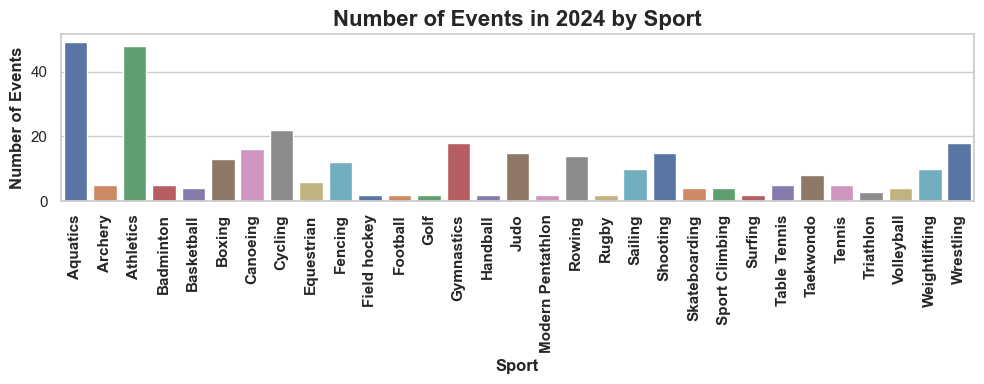

C:\Users\13771\AppData\Local\Temp\ipykernel_38356\3282553531.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sport', y='2028', data=df, palette='deep')


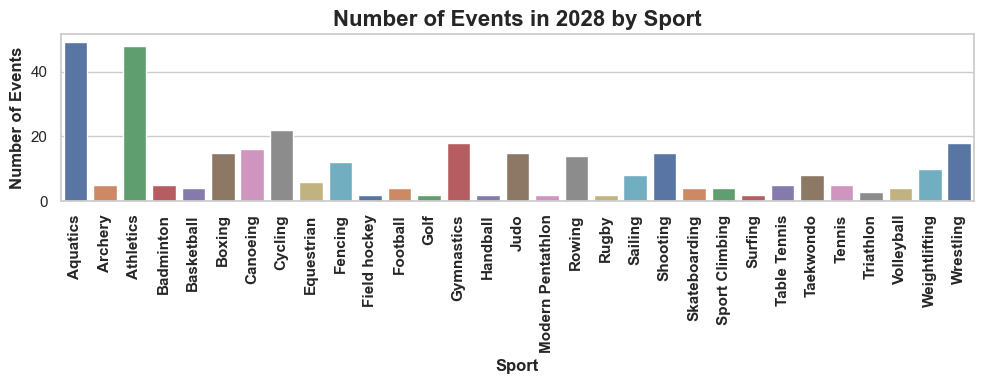

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取处理后的 CSV 数据
df = pd.read_csv('summerOly_programs_processed2.csv')  # 请根据文件路径调整

# 检查数据的前几行
print(df.head())

# 设置Seaborn风格
sns.set(style="whitegrid")

# 创建柱状图，展示每个运动类别的2024年项目数量，使用seaborn的'deep'调色板
plt.figure(figsize=(10, 4))
sns.barplot(x='Sport', y='2024', data=df, palette='deep')

# 添加标题和标签，设置字体加粗
plt.title('Number of Events in 2024 by Sport', fontsize=16, fontweight='bold')
plt.xlabel('Sport', fontsize=12, fontweight='bold')
plt.ylabel('Number of Events', fontsize=12, fontweight='bold')

# 自动旋转X轴标签，设置字体加粗
plt.xticks(rotation=90, fontweight='bold')

# 显示图表
plt.tight_layout()
plt.show()

# 如果你想保存图表为图片文件
plt.figure(figsize=(10, 4))
sns.barplot(x='Sport', y='2028', data=df, palette='deep')
plt.title('Number of Events in 2028 by Sport', fontsize=16, fontweight='bold')
plt.xlabel('Sport', fontsize=12, fontweight='bold')
plt.ylabel('Number of Events', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontweight='bold')
plt.tight_layout()

# 保存为PNG文件
plt.savefig('sport_events_2028_.png')


In [3]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# 读取数据
athletes = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_athletes.csv')
medal_counts = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_medal_counts.csv')
programs = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_programs_processed2.csv')

# 获取每个国家的奖牌数据
medal_counts = medal_counts[['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year']]

# 选取“伟大教练”数据，并合并到运动员数据
athletes['GreatCoach'] = athletes['Coach Na'].apply(lambda x: 1 if x in ['郎平', '贝拉·卡罗'] else 0)

# 生成每个国家的历史金牌数量，作为节点特征
country_medals = medal_counts.groupby('NOC')['Gold'].sum().reset_index()
country_medals.columns = ['NOC', 'GoldMedals']

# 合并所有数据，得到每个国家的节点特征
athletes_data = pd.merge(athletes, country_medals, on='NOC', how='left')

# 创建邻接矩阵，假设相同教练的国家有边相连
edges = []
for i, row1 in athletes_data.iterrows():
    for j, row2 in athletes_data.iterrows():
        if row1['Coach Na'] == row2['Coach Na'] and row1['NOC'] != row2['NOC']:
            edges.append([row1['NOC'], row2['NOC']])

# 转化为图的邻接矩阵
edges = torch.tensor(edges, dtype=torch.long).t().contiguous()

# 创建节点特征矩阵
node_features = athletes_data[['GoldMedals', 'GreatCoach']].values
node_features = torch.tensor(node_features, dtype=torch.float)

# 图数据
data = Data(x=node_features, edge_index=edges)

# 打印数据
print(data)



KeyError: 'Coach Na'

In [5]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# 读取数据
athletes = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_athletes.csv')
medal_counts = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_medal_counts.csv')
programs = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_programs_processed2.csv')

# 获取每个国家的奖牌数据
medal_counts = medal_counts[['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Year']]

# 生成每个国家的历史金牌数量，作为节点特征
country_medals = medal_counts.groupby('NOC')['Gold'].sum().reset_index()
country_medals.columns = ['NOC', 'GoldMedals']

# 合并所有数据，得到每个国家的节点特征
athletes_data = pd.merge(athletes, country_medals, on='NOC', how='left')

# 创建邻接矩阵，假设基于是否参加相同奥运会来建立连接
edges = []
for i, row1 in athletes_data.iterrows():
    for j, row2 in athletes_data.iterrows():
        if row1['Year'] == row2['Year'] and row1['NOC'] != row2['NOC']:
            edges.append([row1['NOC'], row2['NOC']])

# 转化为图的邻接矩阵
edges = torch.tensor(edges, dtype=torch.long).t().contiguous()

# 创建节点特征矩阵
node_features = athletes_data[['GoldMedals', 'Total']].values
node_features = torch.tensor(node_features, dtype=torch.float)

# 图数据
data = Data(x=node_features, edge_index=edges)

# 打印数据
print(data)


KeyboardInterrupt: 

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# 读取数据
df = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_athletes.csv')
medals_df = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_medal_counts.csv')
hosts_df = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_hosts.csv')

# 过滤出只包含奖项的数据
df = df[df['Medal'] != 'No medal']

# 计算每个项目每年的总参赛人数
total_participants = df.groupby(['Year', 'Sport'])['Name'].nunique()

# 计算每个国家、每年、每个项目的金、银、铜奖的数量
medals = df.groupby(['Team', 'Year', 'Sport'])['Medal'].value_counts().unstack(fill_value=0)

# 计算总奖项数
medals['sum_Medals'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

# 获取每个项目每年的总参赛人数并添加到数据框中
medals = medals.join(total_participants, on=['Year', 'Sport'], rsuffix='_Total')

# 重命名列
medals = medals.rename(columns={'Name': 'Total'})

# 计算每种奖项的概率
medals['Gold_Probability'] = medals['Gold'] / medals['Total']
medals['Silver_Probability'] = medals['Silver'] / medals['Total']
medals['Bronze_Probability'] = medals['Bronze'] / medals['Total']
medals['Award_Probability'] = (medals['Gold'] + medals['Silver'] + medals['Bronze']) / medals['Total']

# 重置索引，以便将 Team 和 Year 转换为普通列
medals = medals.reset_index()


medals = medals.rename(columns={'Team': 'NOC'})

# 只选择需要的列
medals_result = medals[['NOC', 'Year', 'Gold_Probability', 'Silver_Probability', 'Bronze_Probability', 'Award_Probability']]

# 合并主场信息
# 提取主办国信息
hosts_df['Host_Country'] = hosts_df['Host'].apply(lambda x: x.split(',')[-1].strip())

# 解决主办国家和NOC的匹配问题
medals_df = pd.merge(medals_df, hosts_df[['Year', 'Host_Country']], on='Year', how='left')

# 创建主办国标志列
medals_df['is_host'] = medals_df['Host_Country'] == medals_df['NOC']
# 合并奖牌数据信息
final_df = pd.merge(medals_result, medals_df[['Year', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total','is_host']], on=['Year', 'NOC'], how='left')
final_df=final_df[5:]
final_df = final_df.reset_index(drop=True)
#print(final_df.columns)

# **数据预处理**
# 删除含有缺失值的行
final_df = final_df.dropna()

# **标签编码**：将 NOC 和 Year 转换为数值型特征
label_encoder = LabelEncoder()

# 对 NOC 列进行标签编码
final_df['NOC'] = label_encoder.fit_transform(final_df['NOC'])


In [4]:
final_df.head()

,NOC,Year,Gold_Probability,Silver_Probability,Bronze_Probability,Award_Probability,Gold,Silver,Bronze,Total,is_host
0,0,2008,0.000000,0.0,0.031250,0.031250,0.0,0.0,1.0,1.0,False
1,0,2012,0.000000,0.0,0.031250,0.031250,0.0,0.0,1.0,1.0,False
2,1,2024,0.000000,0.0,0.027778,0.027778,0.0,0.0,2.0,2.0,False
3,2,1984,0.000000,0.0,0.041667,0.041667,0.0,0.0,2.0,2.0,False
4,2,1992,0.006135,0.0,0.000000,0.006135,1.0,0.0,1.0,2.0,False


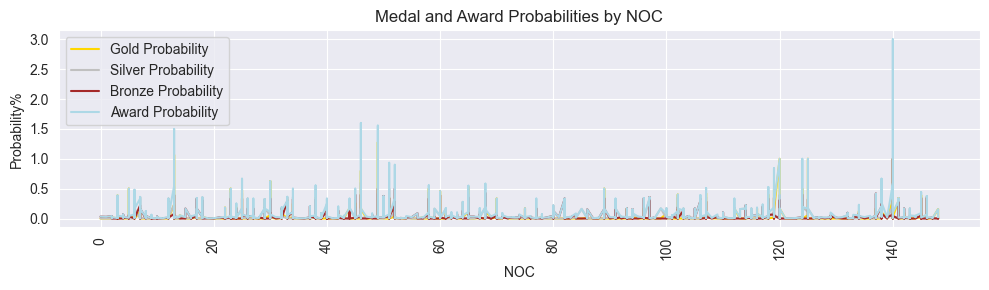

In [12]:
# 创建一个图形
plt.figure(figsize=(10, 3))

# 绘制不同奖牌的概率线条
plt.plot(final_df['NOC'], final_df['Gold_Probability'], label='Gold Probability', color='gold', linestyle='-')
plt.plot(final_df['NOC'], final_df['Silver_Probability'], label='Silver Probability', color='silver', linestyle='-')
plt.plot(final_df['NOC'], final_df['Bronze_Probability'], label='Bronze Probability', color='brown', linestyle='-')
plt.plot(final_df['NOC'], final_df['Award_Probability'], label='Award Probability', color='lightblue', linestyle='-')

# 添加标题和标签
plt.title('Medal and Award Probabilities by NOC')
plt.xlabel('NOC')
plt.ylabel('Probability%')
plt.legend()

# 旋转x轴的标签以便更好地显示
plt.xticks(rotation=90)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

             NOC  Year  Gold_Probability  Silver_Probability  \
0      Australia  2028          0.043555            0.030707   
1          China  2028          0.093927            0.074172   
2         France  2028          0.050051            0.065034   
3        Germany  2028          0.035477            0.042034   
4  Great Britain  2028          0.057197            0.043917   
5          Italy  2028          0.022376            0.017050   
6          Japan  2028          0.049012            0.060009   
7    Netherlands  2028          0.071329            0.038791   
8    South Korea  2028          0.053890            0.014391   
9  United States  2028          0.061689            0.063103   

   Bronze_Probability  Award_Probability       Total is_host  
0            0.050010           0.124272   49.500000     0.0  
1            0.036424           0.204523   90.069767     0.0  
2            0.051355           0.166440   52.465116     0.0  
3            0.039683           0.117193   

C:\Users\13771\AppData\Local\Temp\ipykernel_38356\2137579952.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_2024['NOC']=label_encoder.inverse_transform(df_2020_2024['NOC'])


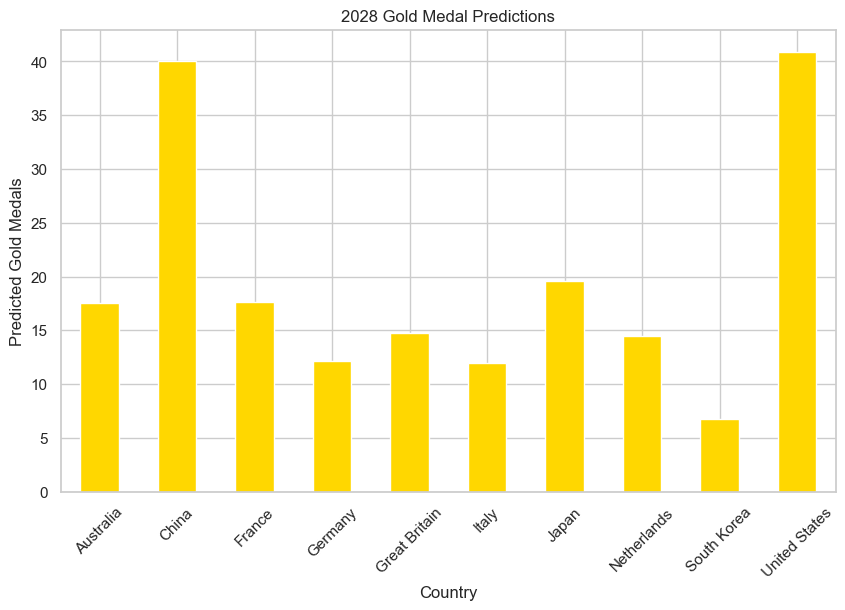

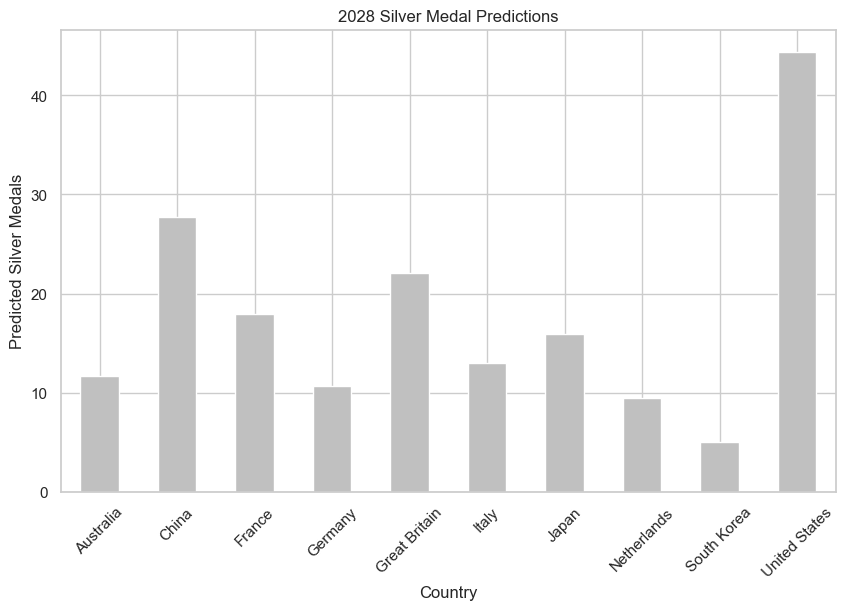

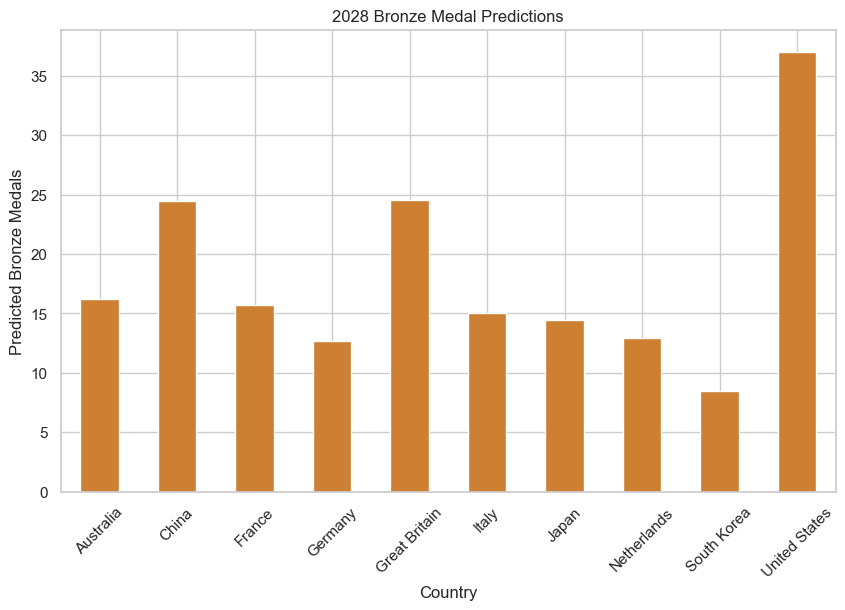

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# 读取数据
df = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_athletes.csv')
medals_df = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_medal_counts.csv')
hosts_df = pd.read_csv('C://2024 美赛培训-写作指导与发布模板/2025_MCM/code/summerOly_hosts.csv')

# 过滤出只包含奖项的数据
df = df[df['Medal'] != 'No medal']

# 计算每个项目每年的总参赛人数
total_participants = df.groupby(['Year', 'Sport'])['Name'].nunique()

# 计算每个国家、每年、每个项目的金、银、铜奖的数量
medals = df.groupby(['Team', 'Year', 'Sport'])['Medal'].value_counts().unstack(fill_value=0)

# 计算总奖项数
medals['sum_Medals'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

# 获取每个项目每年的总参赛人数并添加到数据框中
medals = medals.join(total_participants, on=['Year', 'Sport'], rsuffix='_Total')

# 重命名列
medals = medals.rename(columns={'Name': 'Total'})

# 计算每种奖项的概率
medals['Gold_Probability'] = medals['Gold'] / medals['Total']
medals['Silver_Probability'] = medals['Silver'] / medals['Total']
medals['Bronze_Probability'] = medals['Bronze'] / medals['Total']
medals['Award_Probability'] = (medals['Gold'] + medals['Silver'] + medals['Bronze']) / medals['Total']

# 重置索引，以便将 Team 和 Year 转换为普通列
medals = medals.reset_index()
medals = medals.rename(columns={'Team': 'NOC'})

# 只选择需要的列
medals_result = medals[['NOC', 'Year', 'Gold_Probability', 'Silver_Probability', 'Bronze_Probability', 'Award_Probability']]

# 合并主场信息
hosts_df['Host_Country'] = hosts_df['Host'].apply(lambda x: x.split(',')[-1].strip())

# 解决主办国家和NOC的匹配问题
medals_df = pd.merge(medals_df, hosts_df[['Year', 'Host_Country']], on='Year', how='left')

# 创建主办国标志列
medals_df['is_host'] = medals_df['Host_Country'] == medals_df['NOC']

# 合并奖牌数据信息
final_df = pd.merge(medals_result, medals_df[['Year', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total','is_host']], on=['Year', 'NOC'], how='left')
final_df = final_df.reset_index(drop=True)

# **数据预处理**
# 删除含有缺失值的行
final_df = final_df.dropna()

# **标签编码**：将 NOC 和 Year 转换为数值型特征
label_encoder = LabelEncoder()
final_df['NOC'] = label_encoder.fit_transform(final_df['NOC'])

# **目标变量修改**
# 选择目标变量（奖牌概率）
X = final_df[['NOC', 'Year', 'Gold_Probability', 'Silver_Probability','Bronze_Probability', 'Award_Probability','Total', 'is_host']]
y_gold = final_df['Gold']
y_silver = final_df['Silver']
y_bronze = final_df['Bronze']

# 将数据集划分为训练集和测试集
X_train, X_test, y_train_gold, y_test_gold = train_test_split(X, y_gold, test_size=0.2, random_state=42)
X_train, X_test, y_train_silver, y_test_silver = train_test_split(X, y_silver, test_size=0.2, random_state=42)
X_train, X_test, y_train_bronze, y_test_bronze = train_test_split(X, y_bronze, test_size=0.2, random_state=42)

# **模型训练**
# 使用随机森林回归模型来预测奖牌的概率
rf_model_gold = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_gold.fit(X_train, y_train_gold)

rf_model_silver = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_silver.fit(X_train, y_train_silver)

rf_model_bronze = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_bronze.fit(X_train, y_train_bronze)

# **集成学习：Stacking**
# 使用堆叠回归（Stacking Regressor）模型
stacking_model_gold = StackingRegressor(
    estimators=[('rf', rf_model_gold)],
    final_estimator=LinearRegression()  # 使用线性回归作为元模型
)
stacking_model_gold.fit(X_train, y_train_gold)

stacking_model_silver = StackingRegressor(
    estimators=[('rf', rf_model_silver)],
    final_estimator=LinearRegression()  # 使用线性回归作为元模型
)
stacking_model_silver.fit(X_train, y_train_silver)

stacking_model_bronze = StackingRegressor(
    estimators=[('rf', rf_model_bronze)],
    final_estimator=LinearRegression()  # 使用线性回归作为元模型
)
stacking_model_bronze.fit(X_train, y_train_bronze)

# **计算2024年和2020年各国的平均奖牌概率**
# 选择需要的国家
countries = ['United States', 'China', 'Japan', 'Australia', 'France', 'Netherlands', 'Great Britain', 'South Korea', 'Italy', 'Germany']
label_encoder2=LabelEncoder()
# **计算2024年和2020年各国的平均奖牌概率**
# 获取2020年和2024年的数据
df_2020_2024 = final_df[(final_df['Year'].isin([2020, 2024])) & (final_df['NOC'].isin(label_encoder.transform(countries)))]
df_2020_2024['NOC']=label_encoder.inverse_transform(df_2020_2024['NOC'])
avg_probabilities = df_2020_2024.groupby('NOC')[['Year','Gold_Probability', 'Silver_Probability', 'Bronze_Probability', 'Award_Probability','Total', 'is_host']].mean().reset_index()
avg_probabilities.loc[avg_probabilities['NOC']=='France',"is_host"]=0.0
avg_probabilities.loc[avg_probabilities['NOC']=='Japan',"is_host"]=0.0
avg_probabilities.loc[avg_probabilities['NOC']=='United States',"is_host"]=1.0
avg_probabilities['Year']=2028


X_future = avg_probabilities
print(X_future)

# 标签编码
X_future['NOC'] = label_encoder.transform(X_future['NOC'])

# **进行2028年的奖牌概率预测**
future_preds_gold = stacking_model_gold.predict(X_future)
future_preds_silver = stacking_model_silver.predict(X_future)
future_preds_bronze = stacking_model_bronze.predict(X_future)

# **将预测的奖牌概率转化为奖牌数**
predicted_gold = future_preds_gold * 1  
predicted_silver = future_preds_silver * 1
predicted_bronze = future_preds_bronze * 1

final_df['NOC']=label_encoder.inverse_transform(final_df['NOC'])
print(future_preds_bronze)

countries_list=['Australia','China','France','Germany','Great Britain','Italy','Japan','Netherlands','South Korea','United States']
# **绘制2028年各国金、银、铜奖牌预测数量的柱状图并标注数值**


# 创建一个DataFrame来存储预测结果
predictions_2028 = pd.DataFrame({
    'Country': countries_list,
    'Gold': predicted_gold,
    'Silver': predicted_silver,
    'Bronze': predicted_bronze
})

# 设置Country为索引
predictions_2028.set_index('Country', inplace=True)

# **绘制金牌预测图**
plt.figure(figsize=(10, 6))
ax_gold = predictions_2028['Gold'].plot(kind='bar', color='gold')
plt.title('2028 Gold Medal Predictions')
plt.xlabel('Country')
plt.ylabel('Predicted Gold Medals')
plt.xticks(rotation=45)  # 国家名称旋转45度



plt.show()

# **绘制银牌预测图**
plt.figure(figsize=(10, 6))
ax_silver = predictions_2028['Silver'].plot(kind='bar', color='silver')
plt.title('2028 Silver Medal Predictions')
plt.xlabel('Country')
plt.ylabel('Predicted Silver Medals')
plt.xticks(rotation=45)  # 国家名称旋转45度



plt.show()

# **绘制铜牌预测图**
plt.figure(figsize=(10, 6))
ax_bronze = predictions_2028['Bronze'].plot(kind='bar', color='#cd7f32')  # 铜牌颜色
plt.title('2028 Bronze Medal Predictions')
plt.xlabel('Country')
plt.ylabel('Predicted Bronze Medals')
plt.xticks(rotation=45)  # 国家名称旋转45度



plt.show()


In [17]:
print(future_preds_silver)
print(future_preds_gold)



[11.63763211 27.71312394 17.98163855 10.68553003 22.02055576 13.00064139
 15.93712462  9.48287478  5.03305036 44.40998766]
[17.55949638 40.045458   17.59956046 12.12079832 14.72496314 12.00060609
 19.56270009 14.45453064  6.7622284  40.90683559]


Sex      F     M  Total  Male_Ratio
Year                               
1896     0   143    143    1.000000
1900    13   591    604    0.978477
1904    10   476    486    0.979424
1906     6   452    458    0.986900
1908    16   815    831    0.980746
1912    30   911    941    0.968119
1920    44  1264   1308    0.966361
1924    46   786    832    0.944712
1928    97   637    734    0.867847
1932    62   585    647    0.904173
1936    88   829    917    0.904035
1948   101   751    852    0.881455
1952   140   757    897    0.843924
1956   144   749    893    0.838746
1960   156   755    911    0.828760
1964   200   829   1029    0.805637
1968   215   842   1057    0.796594
1972   250   965   1215    0.794239
1976   389   931   1320    0.705303
1980   434   950   1384    0.686416
1984   494   982   1476    0.665312
1988   554  1028   1582    0.649810
1992   592  1120   1712    0.654206
1996   764  1078   1842    0.585233
2000   880  1124   2004    0.560878
2004   898  1103   2001    0

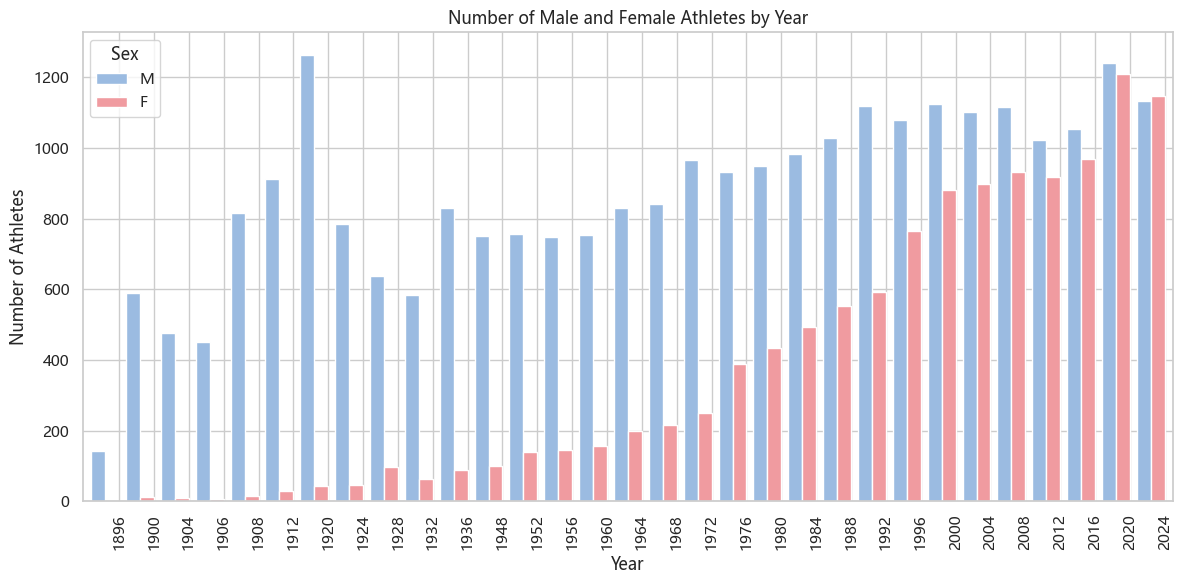

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设数据已经加载到 DataFrame 'df'
# 读取数据
# df = pd.read_csv('your_data.csv')

# 数据预处理
# 按年份和性别统计每届奥运会的男女运动员数量
gender_counts = df.groupby(['Year', 'Sex']).size().unstack(fill_value=0)


# 计算每一届奥运会的总人数
gender_counts['Total'] = gender_counts['M'] + gender_counts['F']

# 计算男选手的比例（男选手数量 / 总人数）
gender_counts['Male_Ratio'] = gender_counts['M'] / gender_counts['Total']
print(gender_counts)

# 创建绘图
fig, ax1 = plt.subplots(figsize=(12, 6))



# 绘制柱状图（男、女运动员数量）
gender_counts[['M', 'F']].plot(kind='bar', color=['#9BBBE1', "#F09BA0"],  ax=ax1, width=0.8, position=1)

# 设置柱状图的标签
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Athletes')
ax1.set_title('Number of Male and Female Athletes by Year')
ax1.set_xticklabels(gender_counts.index, rotation=90)


# 调整布局
plt.tight_layout()

# 显示图表
plt.show()


[array([-0.26666667,  0.73333333,  1.73333333,  2.73333333,  3.73333333,
        4.73333333,  5.73333333]), array([0., 1., 2., 3., 4., 5., 6.]), array([0.26666667, 1.26666667, 2.26666667, 3.26666667, 4.26666667,
       5.26666667, 6.26666667])]


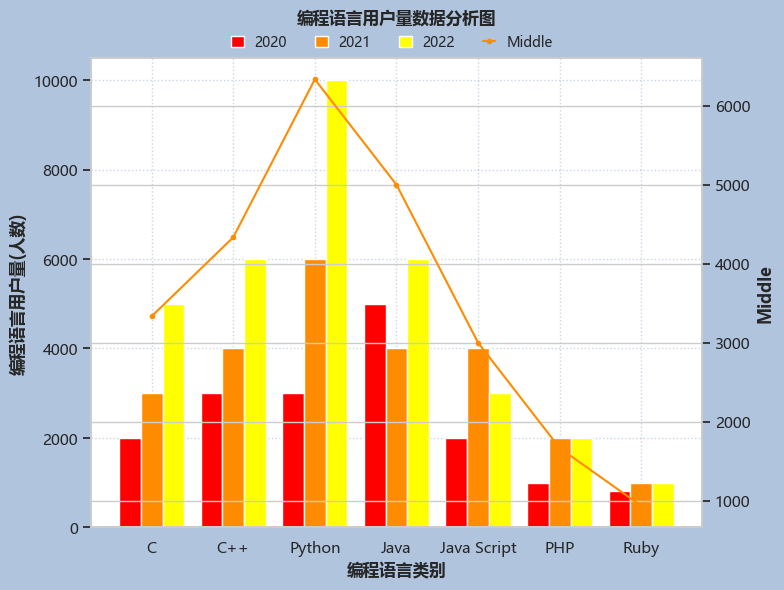

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 设置字体, 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决图像中的'-'负号的乱码问题
plt.rcParams['axes.unicode_minus'] = False

x_labels = ['C', 'C++', 'Python', 'Java', 'Java Script', 'PHP', 'Ruby']
y_2020 = [2000, 3000, 3000, 5000, 2000, 1000, 800]
y_2021 = [3000, 4000, 6000, 4000, 4000, 2000, 1000]
y_2022 = [5000, 6000, 10000, 6000, 3000, 2000, 1000]

y_middle = []
for i in range(len(y_2020)):
    y_middle.append((y_2020[i] + y_2021[i] + y_2022[i]) / 3)

legend_labels = ['2020', '2021', '2022']
y = [y_2020, y_2021, y_2022]
fig = plt.figure(figsize=(8, 6), facecolor='#B0C4DE')
ax = fig.add_subplot(facecolor='white')
# 红橙黄绿青蓝紫
color_list = ['#FF0000', '#FF8C00', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#800080']
x_loc = np.arange(7)
# x轴上每个刻度上能容纳的柱子的总的宽度设为0.8
total_width = 0.8
# 由y值可以看出x轴每个刻度上一共有3组数据, 也即3个柱子
total_num = 3
# 每个柱子的宽度用each_width表示
each_width = total_width / total_num
if total_num % 2 == 0:
    x1 = x_loc - (total_num / 2 - 1) * each_width - each_width / 2
else:
    x1 = x_loc - ((total_num - 1) / 2) * each_width
x_list = [x1 + each_width * i for i in range(total_num)]
print(x_list)
# 这里颜色设置成 橙色:"#FF8C00"
for i in range(0, len(y)):
    ax.bar(x_list[i], y[i], color=color_list[i], width=each_width, label=legend_labels[i])
ax.set_xticks(x_loc)
ax.set_xticklabels(x_labels)
ax.grid(True, ls=':', color='b', alpha=0.3)
ax.set_xlabel('编程语言类别', fontweight='bold')
ax.set_ylabel('编程语言用户量(人数)', fontweight='bold')
plt.title('编程语言用户量数据分析图', fontweight='bold', pad=25)
# 添加双轴
ax_twinx = ax.twinx()
ax_twinx.plot(x_loc, y_middle, linestyle='-', marker='o', markersize=3, color=color_list[1], label='Middle')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.96), frameon=False, ncol=5, handlelength=0.9, handleheight=0.9, fontsize='small')
ax_twinx.set_ylabel('Middle', fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()
